<a href="https://colab.research.google.com/github/CodeWithAkh/Explainable-AI-on-predictive-diagnostics-of-oral-cancer/blob/main/XAI_on_Oral_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cancer='/content/drive/MyDrive/archive/OralCancer/cancer'
non_cancer='/content/drive/MyDrive/archive/OralCancer/non-cancer'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Found 106 images belonging to 2 classes.
Found 25 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 8s/step - accuracy: 0.6564 - loss: 0.7128 - val_accuracy: 0.6800 - val_loss: 0.5927
Epoch 2/10
1/3 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.6875 - loss: 0.6086

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 342ms/step - accuracy: 0.6875 - loss: 0.6086 - val_accuracy: 0.6800 - val_loss: 0.5853
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6680 - loss: 0.6206 - val_accuracy: 0.6800 - val_loss: 0.5781
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 347ms/step - accuracy: 0.4000 - loss: 0.8496 - val_accuracy: 0.6800 - val_loss: 0.5896
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6572 - loss: 0.5737 - val_accuracy: 0.6800 - val_loss: 0.6178
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 344ms/step - accuracy: 0.7188 - loss: 0.5664 - val_accuracy: 0.6800 - val_loss: 0.5917
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6602 - loss: 0.5870 - val_accuracy: 0.6800 - val_loss: 0.5846
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 342ms/step - accuracy: 0.7000 - loss: 0.5099 - val_accuracy: 0.6800 - val_loss: 0.5800
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6795 - loss: 0.4854 - val_accuracy: 0.6800 - val_loss: 0.5836
Epoch 10/10
3/3

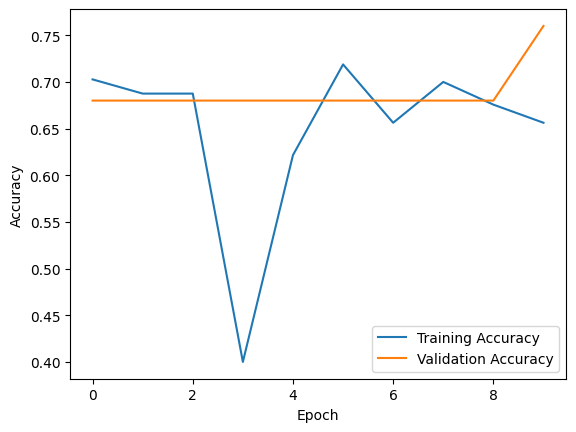

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Constants
IMAGE_SIZE = (150, 150)  # Size to which images will be resized
BATCH_SIZE = 32
EPOCHS = 10
cancer_path = '/content/drive/MyDrive/archive/OralCancer'

# Data Generators for Loading Data
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)  # 80-20 train-validation split

train_generator = train_datagen.flow_from_directory(
    cancer_path,  # Main directory containing cancer and non-cancer folders
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    cancer_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Building the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compiling the Model
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS
)

# Plotting Training Results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Saving the Model
model.save('oral_cancer_detection_model.h5')


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and recompile the saved model
model = tf.keras.models.load_model('oral_cancer_detection_model.h5')
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

def predict_image(img_path):
    img = image.load_img(img_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    prediction_result = int(predictions[0][0] > 0.5)
    class_names = ['Non-Cancer', 'Cancer']

    print("Prediction:", class_names[prediction_result])

# Example usage:
predict_image('/content/drive/MyDrive/archive/OralCancer/cancer/01960a64-cfe8-444d-bbc5-575c15389a21.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Prediction: Non-Cancer


In [ ]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(validation_generator, verbose=1)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6800 - loss: 0.6153
Validation Accuracy: 68.00%


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32
EPOCHS = 50
cancer_path = '/content/drive/MyDrive/archive/OralCancer'

In [ ]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(validation_generator, verbose=1)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6800 - loss: 0.6153
Validation Accuracy: 68.00%


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Constants
IMAGE_SIZE = (256, 256)  # Target image size
BATCH_SIZE = 32
EPOCHS = 10
cancer_path = '/content/drive/MyDrive/archive/OralCancer'

# Data Generators for Loading Data
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    cancer_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    cancer_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Building the CNN Model with Flatten adjustment
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),  # Flatten the output from the Conv layers to feed into Dense layers
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compiling the Model
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS
)

# Evaluate Model Accuracy
val_loss, val_accuracy = model.evaluate(validation_generator, verbose=1)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Found 106 images belonging to 2 classes.
Found 25 images belonging to 2 classes.
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5298 - loss: 2.4398

3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.5291 - loss: 2.6326 - val_accuracy: 0.3200 - val_loss: 1.1670
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 693ms/step - accuracy: 0.1875 - loss: 1.1947 - val_accuracy: 0.3200 - val_loss: 0.8617
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 37s 6s/step - accuracy: 0.3750 - loss: 0.8337 - val_accuracy: 0.6800 - val_loss: 0.6174
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 689ms/step - accuracy: 0.8000 - loss: 0.6060 - val_accuracy: 0.6800 - val_loss: 0.5912
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.6603 - loss: 0.7067 - val_accuracy: 0.6800 - val_loss: 0.6011
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6875 - loss: 0.6303 - val_accuracy: 0.6800 - val_loss: 0.6084
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 6s/step - accuracy: 0.6302 - loss: 0.6492 - val_accuracy: 0.6800 - val_loss: 0.6017
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 670ms/step - accuracy: 0.7000 - loss: 0.5269 - val_accuracy: 0.6800 - val_loss: 0.5884
Epoch 9/10
3/3

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path):
    img = image.load_img(img_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis

    predictions = model.predict(img_array)
    class_names = ['Cancer', 'Non-Cancer']

    print("Prediction:", class_names[int(predictions[0][0] > 0.5)])

# Example usage:
predict_image('/content/drive/MyDrive/archive/OralCancer/non-cancer/20200314_1129242.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Prediction: Cancer


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path to cancer and non-cancer images
cancer_path = '/content/drive/MyDrive/archive/OralCancer'

# Constants
IMAGE_SIZE = (256, 256)  # Target image size
BATCH_SIZE = 32
EPOCHS = 10
LEARNING_RATE = 0.0001

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generators for training and validation
train_generator = train_datagen.flow_from_directory(
    cancer_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    cancer_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Load VGG16 with pre-trained ImageNet weights, without the top classification layer
base_model = VGG16(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Building the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS
)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator, verbose=1)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Save the model
model.save('oral_cancer_detection_model1.h5')

# Prediction Function to Handle Any Input Image
def predict_image(image_path, model, target_size=(256, 256)):
    """
    Preprocesses the image and makes a prediction using the trained model.
    Args:
        image_path: Path to the image to be predicted.
        model: Trained Keras model.
        target_size: The target size to resize the image (default is (256, 256)).
    Returns:
        Prediction result: 'Cancer' or 'Non-Cancer'.
    """
    image = load_img(image_path)
    image = image.convert('RGB')  # Ensure image is in RGB format
    image = image.resize(target_size)  # Resize to match model input size
    image = img_to_array(image) / 255.0  # Normalize the image
    image = tf.expand_dims(image, axis=0)  # Add batch dimension

    # Predict
    prediction = model.predict(image)
    return "Cancer" if prediction[0][0] > 0.5 else "Non-Cancer"

# Example usage
model = tf.keras.models.load_model('oral_cancer_detection_model1.h5') # Corrected line
image_path = '/content/drive/MyDrive/archive/OralCancer/cancer/Tongue-cancer-symptoms.png'  # Replace with the path to your image
result = predict_image(image_path, model)
print(f"Prediction: {result}")


Found 106 images belonging to 2 classes.
Found 25 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 78s 33s/step - accuracy: 0.5164 - loss: 1.0277 - val_accuracy: 0.6800 - val_loss: 0.9433
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 42s 9s/step - accuracy: 0.5312 - loss: 1.3498 - val_accuracy: 0.6800 - val_loss: 0.5567
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 74s 33s/step - accuracy: 0.5822 - loss: 0.7675 - val_accuracy: 0.3600 - val_loss: 0.9159
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 42s 10s/step - accuracy: 0.5000 - loss: 0.8602 - val_accuracy: 0.4400 - val_loss: 0.6542
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 102s 34s/step - accuracy: 0.6930 - loss: 0.5429 - val_accuracy: 0.6800 - val_loss: 0.5159
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 43s 9s/step - accuracy: 0.7500 - loss: 0.5117 - val_accuracy: 0.6800 - val_loss: 0.5971
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 103s 28s/step - accuracy: 0.7175 - loss: 0.5922 - val_accuracy: 0.7600 - val_loss: 

Validation Accuracy: 92.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step
Prediction: Non-Cancer


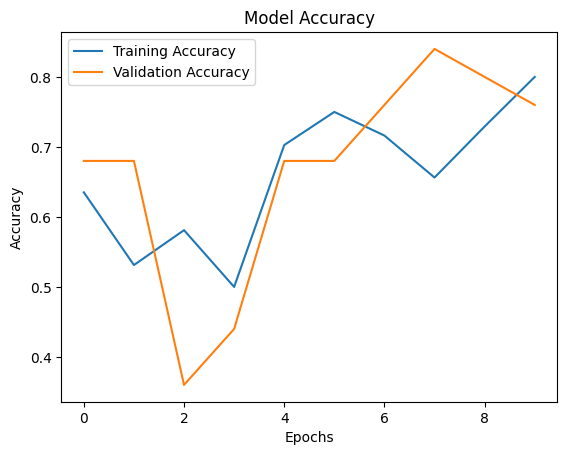

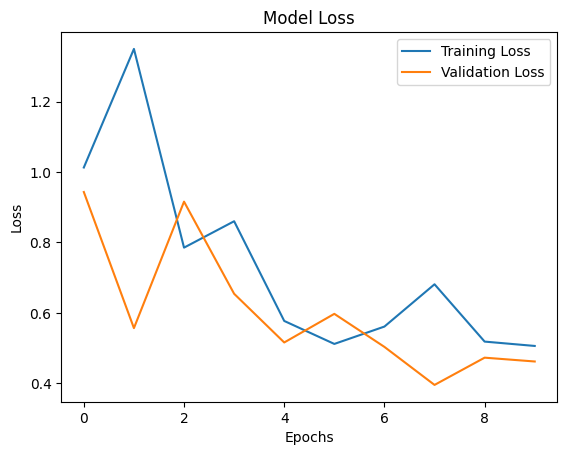

In [ ]:
import matplotlib.pyplot as plt

# Plotting Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path):
    img = image.load_img(img_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis

    predictions = model.predict(img_array)
    class_names = ['Cancer', 'Non-Cancer']

    print("Prediction:", class_names[int(predictions[0][0] > 0.5)])

# Example usage:
predict_image('/content/drive/MyDrive/archive/OralCancer/non-cancer/20200314_1129242.jpg') # Example from previous cells


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step
Prediction: Cancer


In [ ]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf # Make sure tf is imported here if not already in this cell's scope

def predict_image(img_path):
    # Check if the file exists before trying to load it
    if not os.path.exists(img_path):
        print(f"Error: Image file not found at {img_path}")
        return # Exit the function if file is not found

    img = image.load_img(img_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis

    predictions = model.predict(img_array)
    class_names = ['Cancer', 'Non-Cancer']

    print("Prediction:", class_names[int(predictions[0][0] > 0.5)])

# Example usage:
# Add a check here or run !ls /content/ to confirm the file exists
predict_image('/content/2.jpg')

Error: Image file not found at /content/2.jpg


In [ ]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=683c3a918fbc667bed0409b59dc9a9cc0c194b8271a9055e9d023c94b756ba74
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.models import load_model
model = load_model('/content/oral_cancer_detection_model.h5')  # Replace with your model path


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━

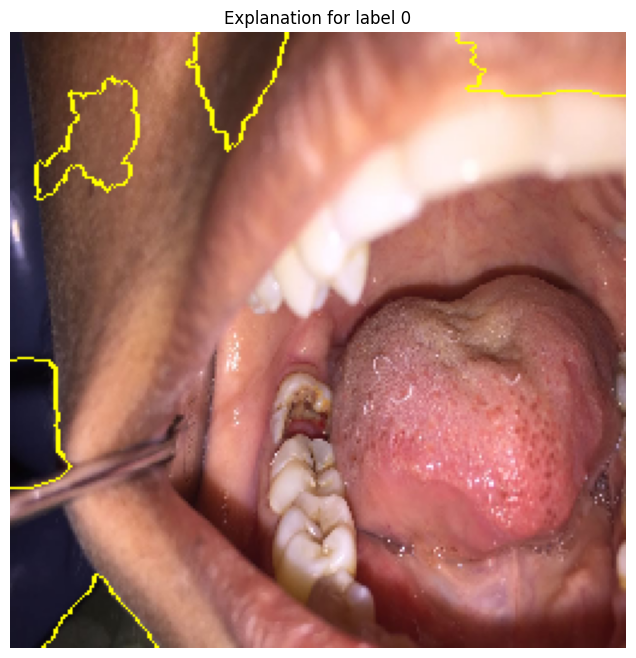

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model  # Load your pre-trained model

# Load your pre-trained model (replace 'path_to_model' with your actual model file)
model = load_model('/content/oral_cancer_detection_model.h5')

# Prediction function for the model
def predict_fn(images):
    # Ensure images are properly reshaped and normalized
    images = np.array(images)
    return model.predict(images)

# Load the image to explain
img_path = '/content/drive/MyDrive/archive/OralCancer/cancer/01960a64-cfe8-444d-bbc5-575c15389a21.jpg'
img = load_img(img_path, target_size=(256, 256))  # Resize to match the model's input size
img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]

# LIME explainer
explainer = lime_image.LimeImageExplainer()

# Explain the image instance
explanation = explainer.explain_instance(
    img_array,               # The image to explain
    predict_fn,              # Your model's prediction function
    top_labels=2,            # Number of top labels to explain
    hide_color=0,            # Color to hide superpixels
    num_samples=1000         # Number of samples for perturbations
)

# Print available labels in the explanation
print("Available labels:", explanation.local_exp.keys())

# Select the label to explain (use a label available in explanation.local_exp)
label_to_explain = list(explanation.local_exp.keys())[0]  # Automatically choose the first available label

# Get image and mask for the selected label
temp, mask = explanation.get_image_and_mask(
    label_to_explain,       # Class to explain
    positive_only=True,     # Highlight positive contributions
    num_features=5,         # Number of superpixels to show
    hide_rest=False         # Whether to hide non-important regions
)

# Plot the result
plt.figure(figsize=(8, 8))
plt.imshow(mark_boundaries(temp, mask))
plt.title(f"Explanation for label {label_to_explain}")
plt.axis('off')
plt.show()
